<a href="https://colab.research.google.com/github/ArquimedesG/Machine_Learning_Colabs/blob/main/ML_S5_Ridge_and_Lasso_11JL23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt


#Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

 The following describes the dataset columns:

    CRIM - per capita crime rate by town

    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

    INDUS - proportion of non-retail business acres per town.

    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

    NOX - nitric oxides concentration (parts per 10 million)

    RM - average number of rooms per dwelling

    AGE - proportion of owner-occupied units built prior to 1940

    DIS - weighted distances to five Boston employment centres

    RAD - index of accessibility to radial highways

    TAX - full-value property-tax rate per $10,000

    PTRATIO - pupil-teacher ratio by town

    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

    LSTAT - % lower status of the population

    MEDV - Median value of owner-occupied homes in $1000's

There are 13 input variables and one ouput variable (Median Value of a Home)

#tf.keras.datasets

The tf.keras.datasets module provide a few toy datasets (already-vectorized, in Numpy format) that can be used for debugging a model or creating simple code examples.

  The datasets available are:

    boston_housing module

    cifar10 module

    cifar100 module

    fashion_mnist module

    imdb module

    mnist module

    reuters module

In [ ]:
#  Importing Boston Housing dataset from keras.datasets
from keras.datasets import boston_housing

# Ridge Regression

Ridge regression or Tikhonov regularization is the regularization technique that performs L2 regularization.

It modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the square of the magnitude of coefficients.

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model.

This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

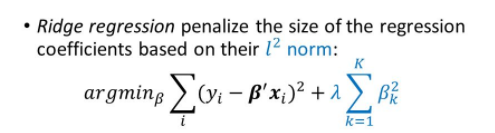

λ is the turning factor which has control over the strength of the penalty term.

When λ = 0, the objective is similar to simple linear regression. You will get the same coefficients as simple linear regression.

When λ = ∞, the coefficients that you get would be zero due to infinite weightage on the square of coefficients as anything less than zero makes the objective infinite.

When 0 < λ < ∞, the magnitude of λ decides the weightage that is allotted to the various parts of the objective.

The minimization objective = LS Obj + λ (the sum of the square of coefficients)
Here, LS Obj is the Least Square Objective. This is the linear regression objective without regularization.

Loss function = OLS + alpha * summation (squared coefficient values)

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting

# sklearn.linear.model.Ridge

*sklearn.linear_model.Ridge* is the module used to solve a regression model where the loss function is the linear least squares function and regularization is given by the L2-norm.

*class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, tol=0.001)*

Parameters :

    alpha : float
    Small positive values of alpha improve the conditioning of the problem and reduce the variance of the estimates. Alpha corresponds to (2*C)^-1 in other linear models such as LogisticRegression or LinearSVC.

    fit_intercept : boolean
    Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations (e.g. data is expected to be already centered).

    normalize : boolean, optional
    If True, the regressors X are normalized

    copy_X : boolean, optional, default True
    If True, X will be copied; else, it may be overwritten.

    tol: float :
    Precision of the solution.

In [ ]:
# Importing Ridge module from sklearn.linear_model
from sklearn.linear_model import Ridge
# Importing mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [ ]:
# Downloading dataset and separating it on train and test groups for inputs and output
(x_train, y_train), (x_test,y_test)= boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
#  Showing the size of the input "x" datasets for train and test
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [ ]:
# Showing the content of input train array "x_train"
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
#  Showing the size of the output "y" datasets for train and test
y_train.shape, y_test.shape

((404,), (102,))

In [ ]:
# Showing the content of output train array "y_train"
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
#  Defining an object "clf" as being of the class Ridge
clf=Ridge()

The clf (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model.

This is done by passing our training set to the fit method.

In [ ]:
# Providing the train datasets to the estimator to fit the model
clf.fit(x_train, y_train)

Ridge()

In [ ]:
# Predicting y_pred outputs dataset based on x_test input dataset
y_pred=clf.predict(x_test)
y_pred

array([ 9.39856575, 20.50624944, 21.57130432, 33.36540233, 25.61028236,
       20.99263222, 28.71995631, 24.87229821, 19.88375387, 22.28300617,
       19.90485025, 18.26792666, 16.40957978, 35.53016206, 18.85902273,
       19.50272481, 24.27551021, 20.87535722, 19.50714827, 24.69470307,
       11.52798774, 16.33455311, 22.42878093, 12.66562797, 21.28416244,
       23.13588726, 32.915096  , 25.17457714, 13.13132004, 20.51717897,
       23.16771266, 18.17197362, 35.87693962, 23.141157  , 18.60220629,
        6.00254147, 15.60180328, 22.33507389, 15.3535816 , 27.61263476,
       22.4649764 , 28.21092786, 18.15490617, 35.01620664, 31.02216739,
       24.61276072, 31.10364938, 18.15183519, 23.24857071, 24.09132879,
       31.18942752, 17.82052871, 10.56289033, 13.84047016, 33.91372541,
       27.34549734, 18.20645506, 40.25034402, 37.26382254, 24.34647993,
       25.58241293, 20.8080617 , 19.44387436, 21.65384862, 24.7917025 ,
       23.57930203, 17.7439233 , 26.53004086,  2.73621002, 12.06

In [ ]:
# Converting both real output y_test and predicted output y_pred datasets to DataFrames
df_y_test=pd.DataFrame(y_test, columns=["y_test"])
df_y_pred=pd.DataFrame(y_pred, columns=["y_pred"])
# Concatenating both dataframes in a single one
pd.concat([df_y_test, df_y_pred],1)


<ipython-input-12-c63fcf92fea8>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat([df_y_test, df_y_pred],1)


,y_test,y_pred
0,7.2,9.398566
1,18.8,20.506249
2,19.0,21.571304
3,27.0,33.365402
4,22.2,25.610282
...,...,...
97,21.9,39.076509
98,24.1,24.649096
99,50.0,40.806255
100,26.7,33.976294


<ipython-input-13-bccec2bc68e9>:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Test", "Predicciones")


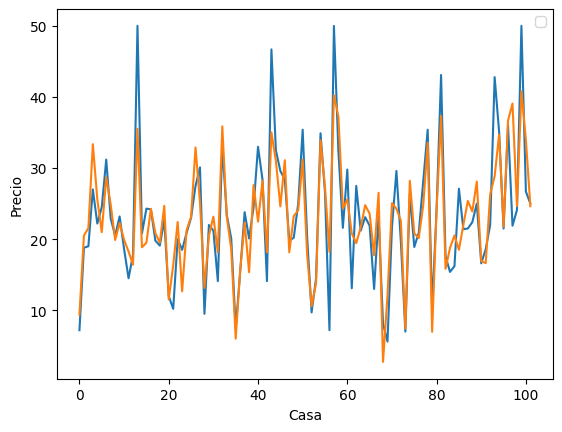

In [ ]:
# Plotting the predicted vs. real outputs for the test dataset
# Defining two plots: y-test and y_pred
plt.plot(y_test)
plt.plot(y_pred)
# Adding labels to each axis
plt.xlabel("Casa")
plt.ylabel("Precio")
# Adding legends to each plot
plt.legend("Test", "Predicciones")

In [ ]:
#  Calculating the Mean-Square Error (MSE) between real and predicted datasets
mean_squared_error(y_test, y_pred)

22.548158689769743

# Lasso (Least Absolute Shrinkage and Selection Operator) Regression

Lasso is the regularisation technique that performs L1 regularisation. It modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the summation of the absolute value of coefficients.

Lasso Regression is a popular type of regularized linear regression that includes an L1 penalty.

This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

This penalty allows some coefficient values to go to the value of zero, allowing input variables to be effectively removed from the model, providing a type of automatic feature selection.

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression.

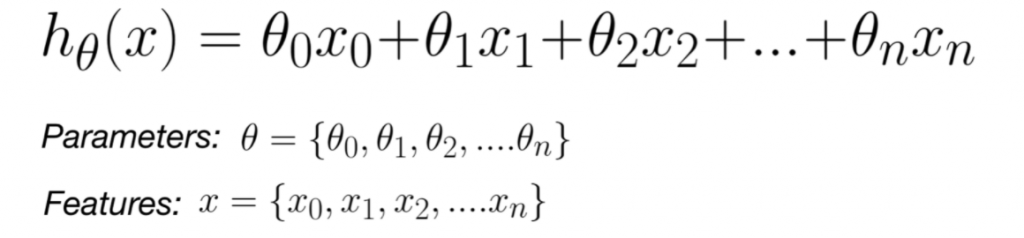

In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the L1-norm).

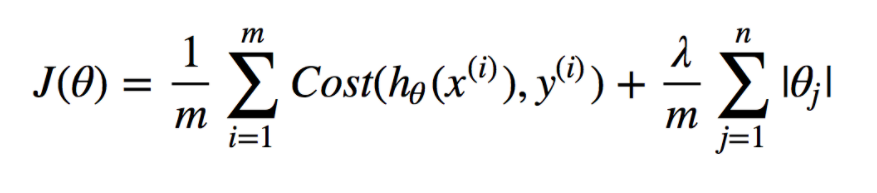

A hyperparameter is used called “lambda” that controls the weighting of the penalty to the loss function. A default value of 1.0 will give full weightings to the penalty; a value of 0 excludes the penalty.

Very small values of lambda, such as 1e-3 or smaller, are common.

Compared to other regularization methods, such as Ridge regression that uses L2 regularization, Lasso regression has the advantage of producing sparse solutions, where only a subset of the features are used in the model.

This makes Lasso regression a popular method for feature selection and high-dimensional data analysis.

# sklearn.linear_model.Lasso

In Python, Lasso regression can be performed using the Lasso class from the sklearn.linear_model library.

Confusingly, the lambda term can be configured via the “alpha” argument when defining the class. The default value is 1.0 or a full penalty.

The Lasso class takes in a parameter called alpha which represents the strength of the regularization term.

A higher alpha value results in a stronger penalty, and therefore fewer features being used in the model.

In other words, a higher alpha value such as 1.0 results in more features being removed from the model than a value such as 0.1.

 The Lasso class also has a fit() method that can be used to fit the model to training data, and a predict() method that can be used to make predictions on new data.


In [ ]:
# Importing Lasso module from sklearn.linear_model
from sklearn.linear_model import Lasso

In [ ]:
#  Defining an object "clf" as being of the class Lasso
clf=Lasso()

In [ ]:
# Providing the train datasets to the estimator to fit the model
clf.fit(x_train, y_train)

Lasso()

In [ ]:
# Predicting y_pred outputs dataset based on x_test input dataset
y_pred=clf.predict(x_test)
y_pred

array([ 6.52827783, 20.09378115, 23.42043205, 30.68540819, 25.78035815,
       20.23468211, 29.03148356, 26.00860951, 20.82927526, 20.57888584,
       19.79553737, 20.61450937, 16.12975873, 31.58478815, 19.84673567,
       22.21475604, 23.33276418, 21.066757  , 19.41669045, 22.89791581,
       11.75744561, 15.49057224, 23.17233668, 15.92276109, 24.75999612,
       22.40198007, 27.30904866, 30.94856782, 11.05280603, 21.992647  ,
       22.53920993, 14.72124022, 31.19263265, 22.51442425, 18.58940979,
        6.09920635, 18.22684247, 23.44127102, 15.37048457, 29.79006825,
       24.4233695 , 26.91212837, 18.31716371, 30.34927395, 31.47690101,
       24.19851382, 29.88713174, 19.46763363, 24.14832981, 24.13136085,
       31.88067624, 19.35574256, 11.89601992, 15.4080905 , 30.91766672,
       27.0304023 , 16.88634828, 34.44174162, 32.4023815 , 25.5280169 ,
       22.78452082, 19.66920258, 15.80672203, 21.52115849, 25.70234823,
       27.36774482, 16.93043342, 28.34601933,  2.18749118, 10.84

In [ ]:
# Converting both real output y_test and predicted output y_pred datasets to DataFrames
df_y_test=pd.DataFrame(y_test, columns=["y_test"])
df_y_pred=pd.DataFrame(y_pred, columns=["y_pred"])
# Concatenating both dataframes in a single one
pd.concat([df_y_test, df_y_pred],1)

<ipython-input-18-c63fcf92fea8>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat([df_y_test, df_y_pred],1)


,y_test,y_pred
0,7.2,6.528278
1,18.8,20.093781
2,19.0,23.420432
3,27.0,30.685408
4,22.2,25.780358
...,...,...
97,21.9,29.686709
98,24.1,23.105558
99,50.0,34.818682
100,26.7,28.197167


<ipython-input-19-bccec2bc68e9>:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Test", "Predicciones")


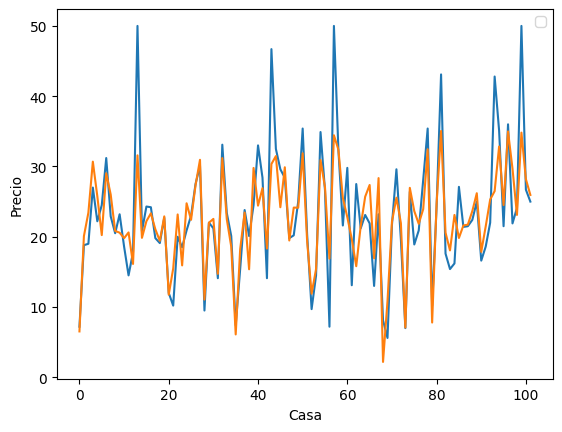

In [ ]:
# Plotting the predicted vs. real outputs for the test dataset
# Defining two plots: y-test and y_pred
plt.plot(y_test)
plt.plot(y_pred)
# Adding labels to each axis
plt.xlabel("Casa")
plt.ylabel("Precio")
# Adding legends to each plot
plt.legend("Test", "Predicciones")

In [ ]:
#  Calculating the Mean-Square Error (MSE) between real and predicted datasets
mean_squared_error(y_test, y_pred)

25.821651189939953

# Bayesian Ridge

Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates. The output or response ‘y’ is assumed to drawn from a probability distribution rather than estimated as a single value.

Mathematically, to obtain a fully probabilistic model the response y is assumed to be Gaussian distributed around Xw
𝑋as follows

p(y⏐X,w,α)=N(y⏐Xw,α)
One of the most useful type of Bayesian regression is Bayesian Ridge regression which estimates a probabilistic model of the regression problem. Here the prior for the coefficient w is given by spherical Gaussian as follows −

p(w⏐λ)=N(w⏐0,λ−1Ip)
This resulting model is called Bayesian Ridge Regression

# sklearn.linear_model.BayesianRidge

*class sklearn.linear_model.BayesianRidge( max_iter=None, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, alpha_init=None, lambda_init=None, compute_score=False, fit_intercept=True, copy_X=True, verbose=False, n_iter='deprecated')*

max_iterint, default=None

Maximum number of iterations over the complete dataset before stopping independently of any early stopping criterion. If None, it corresponds to max_iter=300.

tolfloat, default=1e-3

Stop the algorithm if w has converged.

alpha_1float, default=1e-6

Hyper-parameter : shape parameter for the Gamma distribution prior over the alpha parameter.

alpha_2float, default=1e-6

Hyper-parameter : inverse scale parameter (rate parameter) for the Gamma distribution prior over the alpha parameter.

lambda_1float, default=1e-6

Hyper-parameter : shape parameter for the Gamma distribution prior over the lambda parameter.

lambda_2float, default=1e-6

Hyper-parameter : inverse scale parameter (rate parameter) for the Gamma distribution prior over the lambda parameter.

alpha_initfloat, default=None

Initial value for alpha (precision of the noise). If not set, alpha_init is 1/Var(y).

lambda_initfloat, default=None

Initial value for lambda (precision of the weights). If not set, lambda_init is 1.

compute_scorebool, default=False

If True, compute the log marginal likelihood at each iteration of the optimization.

fit_interceptbool, default=True

Whether to calculate the intercept for this model.
The intercept is not treated as a probabilistic parameter and thus has no associated variance.
If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

copy_Xbool, default=True

If True, X will be copied; else, it may be overwritten.

verbosebool, default=False

Verbose mode when fitting the model.

n_iterint

Maximum number of iterations. Should be greater than or equal to 1.



In [ ]:
# Importing BayesianRidge module from sklearn.linear_model
from sklearn.linear_model import BayesianRidge

In [ ]:
#  Defining an object "clf" as being of the class BayesianRidge
clf=BayesianRidge()

In [ ]:
# Providing the train datasets to the estimator to fit the model
clf.fit(x_train, y_train)

BayesianRidge()

In [ ]:
# Predicting y_pred outputs dataset based on x_test input dataset
y_pred=clf.predict(x_test)
y_pred

array([ 8.88485328, 20.05289191, 22.31509059, 31.82791473, 25.3970158 ,
       21.36903477, 29.23260672, 24.80074   , 19.6662206 , 21.70881908,
       19.52135461, 18.5859989 , 16.27582434, 35.532475  , 18.51670837,
       19.75775762, 23.87193089, 20.70354398, 19.08705048, 24.73422739,
       10.98480057, 15.58190933, 22.49916568, 12.59632569, 21.56515284,
       22.38588212, 31.42598055, 26.35389257, 12.7895834 , 20.37474743,
       22.91991241, 17.03516121, 34.70000535, 22.74345934, 18.24844325,
        6.11644562, 17.37265463, 21.97517483, 14.54454154, 28.23980027,
       22.83670687, 27.81311591, 18.57934727, 34.98827738, 30.99612867,
       24.62286837, 31.18126933, 18.34305525, 23.93019447, 24.03007138,
       31.77346723, 17.13053377, 10.80766068, 14.01624279, 33.32883719,
       27.19845225, 18.26912165, 40.22297896, 35.97887644, 24.20390721,
       25.26524348, 20.93846551, 18.38639076, 21.94375536, 25.01794241,
       23.83832792, 18.01605893, 26.49785034,  1.48531611, 12.05

In [ ]:
# Converting both real output y_test and predicted output y_pred datasets to DataFrames
df_y_test=pd.DataFrame(y_test, columns=["y_test"])
df_y_pred=pd.DataFrame(y_pred, columns=["y_pred"])
# Concatenating both dataframes in a single one
pd.concat([df_y_test, df_y_pred],1)

<ipython-input-25-c63fcf92fea8>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat([df_y_test, df_y_pred],1)


,y_test,y_pred
0,7.2,8.884853
1,18.8,20.052892
2,19.0,22.315091
3,27.0,31.827915
4,22.2,25.397016
...,...,...
97,21.9,38.179229
98,24.1,24.052347
99,50.0,39.139910
100,26.7,32.374626


<ipython-input-26-bccec2bc68e9>:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Test", "Predicciones")


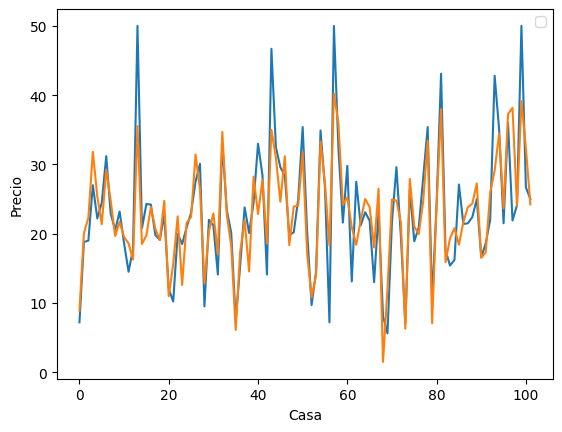

In [ ]:
# Plotting the predicted vs. real outputs for the test dataset
# Defining two plots: y-test and y_pred
plt.plot(y_test)
plt.plot(y_pred)
# Adding labels to each axis
plt.xlabel("Casa")
plt.ylabel("Precio")
# Adding legends to each plot
plt.legend("Test", "Predicciones")

In [ ]:
#  Calculating the Mean-Square Error (MSE) between real and predicted datasets
mean_squared_error(y_test, y_pred)

21.97652313058199